# Rusty Bargain

El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

# Características del Dataset

- DateCrawled — fecha en la que se descargó el perfil de la base de datos
- VehicleType — tipo de carrocería del vehículo
- RegistrationYear — año de matriculación del vehículo
- Gearbox — tipo de caja de cambios
- Power — potencia (CV)
- Model — modelo del vehículo
- Mileage — kilometraje (medido en km de acuerdo con las especificidades regionales del conjunto de datos)
- RegistrationMonth — mes de matriculación del vehículo
- FuelType — tipo de combustible
- Brand — marca del vehículo
- NotRepaired — vehículo con o sin reparación
- DateCreated — fecha de creación del perfil
- NumberOfPictures — número de fotos del vehículo
- PostalCode — código postal del propietario del perfil (usuario)
- LastSeen — fecha de la última vez que el usuario estuvo activo

Objetivo
- Price — precio (en euros)

## Preparación de datos

Importar datos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Carga de los datos

In [2]:
df = pd.read_csv('/datasets/car_data.csv')

### Exploración de los datos

In [3]:
df

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,21/03/2016 09:50,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,21/03/2016 00:00,0,2694,21/03/2016 10:42
354365,14/03/2016 17:48,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,14/03/2016 00:00,0,39576,06/04/2016 00:46
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

En un primer vistazo se observa que las columnas `DateCrawled`, `DateCreated` y `LastSeen` estan con un Dtype de object, cuando deberia ser datetime64, el resto se encuentra bien.

In [40]:
# Convertir la columnas 'DateCrawled', 'DateCreated' y 'LastSeen' a datetime64
df['DateCrawled'] = pd.to_datetime(df['DateCrawled'], format='%d/%m/%Y %H:%M')
df['DateCreated'] = pd.to_datetime(df['DateCreated'], format='%d/%m/%Y %H:%M')
df['LastSeen'] = pd.to_datetime(df['LastSeen'], format='%d/%m/%Y %H:%M')

# Verificar el resultado
print(df['DateCrawled'].dtype)
print(df['DateCreated'].dtype)
print(df['LastSeen'].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]


#### Valores Nulos

In [6]:
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

Podemos ver que las columnas que poseen valores ausentes son del tipo cualitativas, los modelos de entrenamiento LightGBM y CatBoost, pueden procesar estos datos categoricos, pero si quiero usar otro tipo de modelo voy a tener que usar el metodo de OHE.

#### Estadisticas de las variables cuantitativas

In [8]:
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Cuando observamos las variables cuantitativas vemos lo siguiente:

- La columna `NumberOfPictures` no tiene ningún valor, por lo que deberiamos eliminar esta columna.
- El valor minimo de `Price` es 0.
- El valor minimo de `RegistrationYear` es de 1000 y el maximo es de 9999.
- Tambien se repite un valor minimo de 0 en la columna `Power`, `Price` y `RegistrationMonth`.


#### Graficos

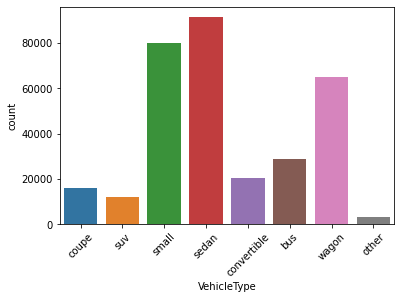

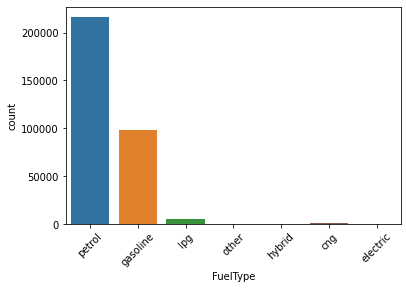

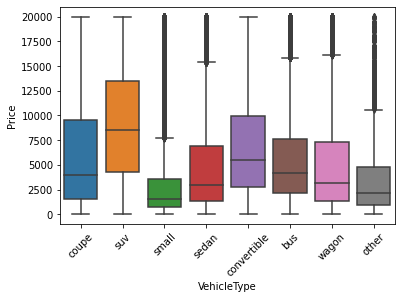

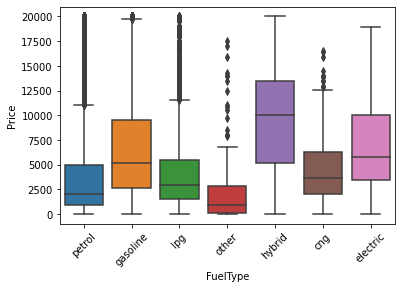

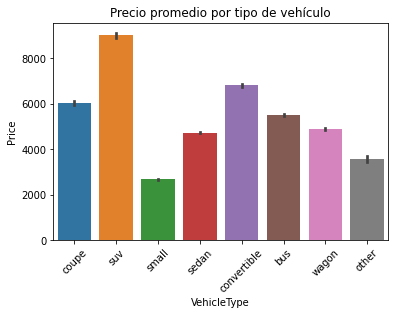

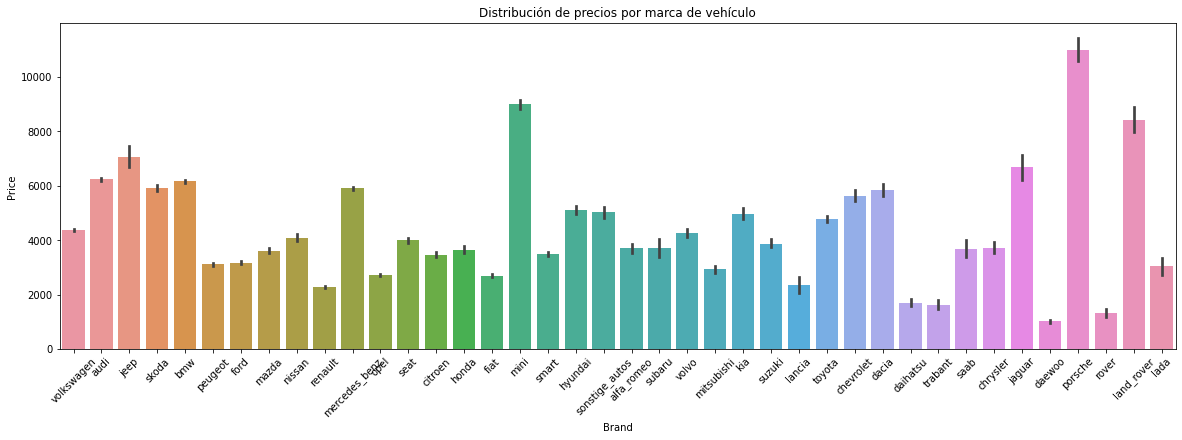

In [9]:
# Gráfico de barras para variables categóricas
sns.countplot(x='VehicleType', data=df)
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='FuelType', data=df)
plt.xticks(rotation=45)
plt.show()

# Gráfico de caja y bigotes para comparar variables numéricas por categoría
sns.boxplot(x='VehicleType', y='Price', data=df)
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x='FuelType', y='Price', data=df)
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras entre Price y VehicleType
sns.barplot(x='VehicleType', y='Price', data=df)
plt.title('Precio promedio por tipo de vehículo')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barra entre Price y Brand
plt.figure(figsize=(20, 6))
df_sorted = df.sort_values(by='Price', ascending=False)
sns.barplot(x='Brand', y='Price', data=df)
plt.title('Distribución de precios por marca de vehículo')
plt.xticks(rotation=45)
plt.show()


Las conclusiones que podemos sacar de los grafícos son las siguientes:
- Los tipos de vehiculos que mas se publican son:
    - Sedan
    - Pequeños
    - Wagon (Familiares)
    - Bus
    
- Los tipos de combustibles con mayor presencia son:
    - Petroleo (Nafta)
    - Gasoline (Diesel)
    - LPG (Gas de Petroleo Licuado)
    
- Cuando vemos los precios publicados vs el tipo de vehículos los 3 primeros son:
    - SUV
    - Coupe
    - Convertible
    
- Cuando comparamos los precios publicados vs el tipo de combustible del vehículos vemos que los 3 primero son:
    - Hibridos
    - Electricos
    - Diesel
    
- El quinto gráfico es parecido al tercero, solo que este muestra el precio promedio de vehículos publicados, mientras que el en tercer gráfico vemos el rango de precios de cada vehículo, se pueden apreciar valores atipicos en este tipo de gráficos que dependen del vendedor y de la ganancia que quiere lograr con la venta.

- El último gráfico nos muestra las marcas con mayor precio, las 5 marcas mas caras son:
    - Porche
    - Mini
    - Land Rover
    - Jeep
    - Jaguar

#### Copia del DataFrame para su manipulación

In [10]:
df_copy1 = df.copy()

Eliminacion de las columnas que no me sirven para el modelaje `NumberOfPicture`, `PostalCode`, `LastSeen`,`DateCrawled` y `DateCreated` .

In [11]:
# Eliminar las columnas 'NumberOfPictures' y 'PostalCode'
df_copy1 = df_copy1.drop(['NumberOfPictures', 'PostalCode', 'DateCrawled', 'LastSeen', 'DateCreated'], axis=1)

Relleno de los valores ausentes en las variables categoricas con `Unknown` para cuando use el modelo XGBoost tengan el mismo peso estos datos una vez usado el metodo de OHE.

In [12]:
df_copy1['VehicleType'].fillna('Unknown', inplace=True)
df_copy1['Gearbox'].fillna('Unknown', inplace=True)
df_copy1['FuelType'].fillna('Unknown', inplace=True)
df_copy1['NotRepaired'].fillna('Unknown', inplace=True)
df_copy1['Model'].fillna('Unknown', inplace=True)

In [13]:
df_copy1.isna().sum()

Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Mileage              0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
dtype: int64

Ya no hay valores nulos, pero existen filas con valores iguales a 0, voy a rellenar estos valores por su media y mediana

In [14]:
count_zeros_price = df_copy1['Price'].value_counts().get(0, 0)
count_zeros_registration_month = df_copy1['RegistrationMonth'].value_counts().get(0, 0)
count_zeros_power = df_copy1['Power'].value_counts().get(0, 0)

print("Cantidad de veces que aparece el valor 0 en la columna 'Price':", count_zeros_price)
print("Cantidad de veces que aparece el valor 0 en la columna 'RegistrationMonth':", count_zeros_registration_month)
print("Cantidad de veces que aparece el valor 0 en la columna 'Power':", count_zeros_power)

Cantidad de veces que aparece el valor 0 en la columna 'Price': 10772
Cantidad de veces que aparece el valor 0 en la columna 'RegistrationMonth': 37352
Cantidad de veces que aparece el valor 0 en la columna 'Power': 40225


In [15]:
df_copy1['Price'] = df_copy1.groupby(['VehicleType', 'Brand', 'Model'])['Price'].transform(lambda x: x.replace(0, x.mean()))
df_copy1['RegistrationMonth'] = df_copy1.groupby(['Brand', 'Model'])['RegistrationMonth'].transform(lambda x: x.replace(0, x.median()))
df_copy1['Power'] = df_copy1.groupby(['Brand', 'Model'])['Power'].transform(lambda x: x.replace(0, x.mean()))

In [16]:
count_zeros_price = df_copy1['Price'].value_counts().get(0, 0)
count_zeros_registration_month = df_copy1['RegistrationMonth'].value_counts().get(0, 0)
count_zeros_power = df_copy1['Power'].value_counts().get(0, 0)

print("Cantidad de veces que aparece el valor 0 en la columna 'Price':", count_zeros_price)
print("Cantidad de veces que aparece el valor 0 en la columna 'RegistrationMonth':", count_zeros_registration_month)
print("Cantidad de veces que aparece el valor 0 en la columna 'Power':", count_zeros_power)

Cantidad de veces que aparece el valor 0 en la columna 'Price': 19
Cantidad de veces que aparece el valor 0 en la columna 'RegistrationMonth': 104
Cantidad de veces que aparece el valor 0 en la columna 'Power': 2


Vemos que el número de valores 0 bajo considerablemente, voy a eliminar las filas con estos valores para que no me produscan ruido.

In [17]:
df_copy1 = df_copy1[~(df_copy1 == 0).any(axis=1)]

In [18]:
count_zeros_price = df_copy1['Price'].value_counts().get(0, 0)
count_zeros_registration_month = df_copy1['RegistrationMonth'].value_counts().get(0, 0)
count_zeros_power = df_copy1['Power'].value_counts().get(0, 0)

print("Cantidad de veces que aparece el valor 0 en la columna 'Price':", count_zeros_price)
print("Cantidad de veces que aparece el valor 0 en la columna 'RegistrationMonth':", count_zeros_registration_month)
print("Cantidad de veces que aparece el valor 0 en la columna 'Power':", count_zeros_power)

Cantidad de veces que aparece el valor 0 en la columna 'Price': 0
Cantidad de veces que aparece el valor 0 en la columna 'RegistrationMonth': 0
Cantidad de veces que aparece el valor 0 en la columna 'Power': 0


Ahora si vemos que no hay filas con valores iguales a 0.

Veamos como quedaron los valores estadisticos de las columnas

In [19]:
df_copy1.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth
count,354247.000000,354247.000000,354247.000000,354247.000000,354247.000000
mean,4516.370895,2004.245620,121.500695,128230.909507,6.262413
std,4467.252658,90.213644,186.332041,37881.691361,3.205621
min,1.000000,1000.000000,1.000000,5000.000000,1.000000
25%,1200.000000,1999.000000,75.000000,125000.000000,4.000000
50%,2850.000000,2003.000000,109.000000,150000.000000,6.000000
75%,6498.500000,2008.000000,143.000000,150000.000000,9.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000


En la columna `RegistrationYear` vemos que hay valores atipicos el año minimo de registración es de 1000, esto no puede ser vamos a tratar esta columna.

In [20]:
unique_years = sorted(df_copy1['RegistrationYear'].unique(), reverse=True)
print(unique_years)

[9999, 9996, 9450, 9229, 9000, 8888, 8500, 8455, 8200, 8000, 7800, 7500, 7100, 7000, 6500, 6000, 5911, 5900, 5600, 5555, 5300, 5000, 4800, 4500, 4100, 4000, 3800, 3700, 3500, 3200, 3000, 2900, 2800, 2500, 2290, 2222, 2200, 2066, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949, 1948, 1947, 1946, 1945, 1944, 1943, 1942, 1941, 1940, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930, 1929, 1928, 1927, 1925, 1923, 1920, 1919, 1915, 1910, 1800, 1688, 1602, 1600, 1500, 1400, 1300, 1255, 1253, 1234, 1200, 1111, 1039, 1001, 1000]


Voy a eliminar las filas con valores menores al año 1920 y mayores al año 2019.

In [21]:
df_copy1 = df_copy1.drop(df_copy1[(df_copy1['RegistrationYear'] < 1920) | (df_copy1['RegistrationYear'] > 2019)].index).reset_index(drop=True)

In [22]:
df_copy1.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth
count,353981.000000,353981.000000,353981.000000,353981.000000,353981.000000
mean,4517.998033,2003.115687,121.457834,128304.951396,6.263729
std,4467.440800,7.361355,186.039913,37772.830719,3.206048
min,1.000000,1920.000000,1.000000,5000.000000,1.000000
25%,1200.000000,1999.000000,75.000000,125000.000000,4.000000
50%,2850.000000,2003.000000,109.000000,150000.000000,6.000000
75%,6499.000000,2008.000000,143.000000,150000.000000,9.000000
max,20000.000000,2019.000000,20000.000000,150000.000000,12.000000


Ahora los valores tienen sentido.

Voy a observar como quedo el dataframe

In [23]:
df_copy1

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
0,480.000000,Unknown,1993,manual,97.542898,golf,150000,6.0,petrol,volkswagen,Unknown
1,18300.000000,coupe,2011,manual,190.000000,Unknown,125000,5.0,gasoline,audi,yes
2,9800.000000,suv,2004,auto,163.000000,grand,125000,8.0,gasoline,jeep,Unknown
3,1500.000000,small,2001,manual,75.000000,golf,150000,6.0,petrol,volkswagen,no
4,3600.000000,small,2008,manual,69.000000,fabia,90000,7.0,gasoline,skoda,no
...,...,...,...,...,...,...,...,...,...,...,...
353976,1448.034188,Unknown,2005,manual,79.810127,colt,150000,7.0,petrol,mitsubishi,yes
353977,2200.000000,Unknown,2005,Unknown,92.071429,Unknown,20000,1.0,Unknown,sonstige_autos,Unknown
353978,1199.000000,convertible,2000,auto,101.000000,fortwo,125000,3.0,petrol,smart,no
353979,9200.000000,bus,1996,manual,102.000000,transporter,150000,3.0,gasoline,volkswagen,no


Listo ya no hay valores atipicos.

Creo un dataframe con el metodo de OHE para poder analizar las columnas categoricas en mis modelos.

In [24]:
df_copy1_encoded = pd.get_dummies(df_copy1)

In [25]:
df_copy1_encoded

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,VehicleType_Unknown,VehicleType_bus,VehicleType_convertible,VehicleType_coupe,VehicleType_other,...,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,NotRepaired_Unknown,NotRepaired_no,NotRepaired_yes
0,480.000000,1993,97.542898,150000,6.0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,18300.000000,2011,190.000000,125000,5.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,9800.000000,2004,163.000000,125000,8.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1500.000000,2001,75.000000,150000,6.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,3600.000000,2008,69.000000,90000,7.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353976,1448.034188,2005,79.810127,150000,7.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
353977,2200.000000,2005,92.071429,20000,1.0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
353978,1199.000000,2000,101.000000,125000,3.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
353979,9200.000000,1996,102.000000,150000,3.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


## Entrenamiento del modelo 

Comienzo el entramiento de los modelos creando primero un modelo de Regresión Lineal que va a servir como modelo de cordura, voy a utilizar la metrica de RECM de los modelos para poder compara la precisión de cada modelo. Si el valor de cada modelo es mayor que el de la Regresión Lineal quiere decir que en algún punto me equivoque y el modelo esta mal.

### Modelo de Regresión Lineal

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Preparar los datos
X = df_copy1_encoded.drop(['Price'], axis=1)
y = df_copy1_encoded['Price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_linear = model.predict(X_test)

# Evaluar la calidad del modelo utilizando la métrica RECM (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred_linear)
print('RECM:', rmse)

RECM: 8059808.191182139


### Entrenamiento de Descenso de Gradiente

In [27]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Dividir el dataframe en características y objetivo
features = df_copy1_encoded.drop(['Price'], axis=1)
target = df_copy1_encoded['Price']

# Escalar los datos utilizando StandardScaler para los valores infinitos
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Dividir en conjuntos de entrenamiento y prueba
features_train, features_test, target_train, target_test = train_test_split(
    features_scaled, target, test_size=0.25, random_state=12345
)

class SGDLinearRegression:
    def __init__(self, step_size, epochs, batch_size):
        self.step_size = step_size
        self.epochs = epochs
        self.batch_size = batch_size

    def fit(self, train_features, train_target):
        X = np.concatenate(
            (np.ones((train_features.shape[0], 1)), train_features), axis=1
        )
        y = train_target
        w = np.zeros(X.shape[1])

        for _ in range(self.epochs):
            batches_count = X.shape[0] // self.batch_size
            for i in range(batches_count):
                begin = i * self.batch_size
                end = (i + 1) * self.batch_size
                X_batch = X[begin:end, :]
                y_batch = y[begin:end]

                gradient = (
                    2
                    * X_batch.T.dot(X_batch.dot(w) - y_batch)
                    / X_batch.shape[0]
                )

                w -= self.step_size * gradient

        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0


model = SGDLinearRegression(0.01, 10, 100)
model.fit(features_train, target_train)
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

r2_train = r2_score(target_train, pred_train).round(5)
r2_test = r2_score(target_test, pred_test).round(5)

print("R^2 (Train):", r2_train)
print("R^2 (Test):", r2_test)

rmse_train = np.sqrt(mean_squared_error(target_train, pred_train)).round(5)
rmse_test = np.sqrt(mean_squared_error(target_test, pred_test)).round(5)
print("RMSE (Train):", rmse_train)
print("RMSE (Test):", rmse_test)


R^2 (Train): -1.2343890531786897e+162
R^2 (Test): -2.690023320487727e+161
RMSE (Train): 4.962776354983734e+84
RMSE (Test): 2.31799668068513e+84


### Bosque Aleatorio

In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt

# Obtener una muestra de 1000 datos de df_copy1
sample_size = 10000
df_sample = df_copy1.sample(n=sample_size, random_state=12345)

# Dividir los datos en características (X) y variable objetivo (y)
X = df_sample.drop('Price', axis=1)  
y = df_sample['Price'] 

# Convertir variables categóricas en codificación one-hot
X_encoded = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=12345)

# Definir los hiperparámetros a probar en la búsqueda
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 3, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Crear el modelo de Bosque Aleatorio
model = RandomForestRegressor(random_state=12345, n_jobs=-1)

# Realizar la búsqueda de hiperparámetros mediante búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error', n_iter=10)
random_search.fit(X_train, y_train)

# Obtener el mejor modelo con los hiperparámetros óptimos
best_model = random_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# Obtener los mejores hiperparámetros encontrados
best_params = random_search.best_params_

# Calcular el valor de RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))

print("Mejores hiperparámetros:", best_params)
print("Valor de RECM:", rmse)

Mejores hiperparámetros: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}
Valor de RECM: 2071.211523099153


### LightGBM 

In [29]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from math import sqrt

# Crear el modelo LightGBM
lgb_model = lgb.LGBMRegressor(random_state=123456)

# Entrenar el modelo
lgb_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_lightgbm = lgb_model.predict(X_test)

# Calcular el valor de RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred_lightgbm))
print("Valor de RMSE:", rmse)


Valor de RMSE: 1992.6803707728827


### XGBoost

In [30]:
import xgboost as xgb

# Crear el modelo XGBoost
xgb = xgb.XGBRegressor(random_state = 123456)

# Entrenar el modelo
xgb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_xgboost = xgb.predict(X_test)

# Calcular el valor de RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred_xgboost))
print("Valor de RECM:", rmse)

Valor de RECM: 2021.1292120238452


### CatBoost

In [31]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Crear el modelo CatBoost
catboost_model = CatBoostRegressor(random_state=123456)

# Entrenar el modelo
catboost_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_catboost = catboost_model.predict(X_test)

# Calcular el valor de RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred_catboost))
print("Valor de RMSE:", rmse)


Learning rate set to 0.056291
0:	learn: 4306.1638125	total: 48.8ms	remaining: 48.8s
1:	learn: 4165.3704778	total: 51.7ms	remaining: 25.8s
2:	learn: 4026.3644177	total: 54.5ms	remaining: 18.1s
3:	learn: 3907.2849375	total: 56.9ms	remaining: 14.2s
4:	learn: 3786.1259755	total: 59.6ms	remaining: 11.9s
5:	learn: 3671.9854032	total: 62.1ms	remaining: 10.3s
6:	learn: 3571.6703597	total: 64.5ms	remaining: 9.15s
7:	learn: 3469.9801958	total: 67.1ms	remaining: 8.31s
8:	learn: 3380.0510867	total: 69.6ms	remaining: 7.67s
9:	learn: 3293.4875923	total: 72.1ms	remaining: 7.14s
10:	learn: 3210.6736276	total: 74.7ms	remaining: 6.72s
11:	learn: 3145.9080345	total: 77.2ms	remaining: 6.35s
12:	learn: 3079.8650388	total: 79.7ms	remaining: 6.05s
13:	learn: 3019.0024953	total: 82.1ms	remaining: 5.78s
14:	learn: 2957.5659683	total: 84.8ms	remaining: 5.57s
15:	learn: 2901.8845533	total: 87.2ms	remaining: 5.36s
16:	learn: 2852.3898341	total: 89.8ms	remaining: 5.19s
17:	learn: 2806.4391402	total: 92.3ms	remaini

## Análisis de los modelos

Para analizar los modelos voy a comparar los valores de RECM de cada uno al igual que el tiempo de ejecucción de cada codigo.

### Tiempo de ejecución de los codigos de los modelos

In [32]:
%%timeit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Preparar los datos
X = df_copy1_encoded.drop(['Price'], axis=1)
y = df_copy1_encoded['Price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_linear = model.predict(X_test)

# Evaluar la calidad del modelo utilizando la métrica RECM (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred_linear)
print('RECM:', rmse)

RECM: 8059808.191182139
RECM: 8059808.191182139
RECM: 8059808.191182139
RECM: 8059808.191182139
RECM: 8059808.191182139
RECM: 8059808.191182139
RECM: 8059808.191182139
RECM: 8059808.191182139
22.4 s ± 211 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [38]:
%%timeit
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt

# Obtener una muestra de 1000 datos de df_copy1
sample_size = 10000
df_sample = df_copy1.sample(n=sample_size, random_state=12345)

# Dividir los datos en características (X) y variable objetivo (y)
X = df_sample.drop('Price', axis=1)  
y = df_sample['Price'] 

# Convertir variables categóricas en codificación one-hot
X_encoded = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=12345)

# Definir los hiperparámetros a probar en la búsqueda
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 3, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Crear el modelo de Bosque Aleatorio
model = RandomForestRegressor(random_state=12345, n_jobs=-1)

# Realizar la búsqueda de hiperparámetros mediante búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error', n_iter=10)
random_search.fit(X_train, y_train)

# Obtener el mejor modelo con los hiperparámetros óptimos
best_model = random_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# Obtener los mejores hiperparámetros encontrados
best_params = random_search.best_params_

# Calcular el valor de RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))

print("Mejores hiperparámetros:", best_params)
print("Valor de RECM:", rmse)

Mejores hiperparámetros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 6}
Valor de RECM: 2306.485247007042
Mejores hiperparámetros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}
Valor de RECM: 2076.475587161247
Mejores hiperparámetros: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 8}
Valor de RECM: 2177.3900499091465
Mejores hiperparámetros: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None}
Valor de RECM: 2087.0074419709963
Mejores hiperparámetros: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}
Valor de RECM: 2071.2125758331586
Mejores hiperparámetros: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None}
Valor de RECM:

In [35]:
%%timeit
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from math import sqrt

# Crear el modelo LightGBM
lgb_model = lgb.LGBMRegressor(random_state=123456)

# Entrenar el modelo
lgb_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_lightgbm = lgb_model.predict(X_test)

# Calcular el valor de RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred_lightgbm))
print("Valor de RMSE:", rmse)



Valor de RMSE: 1992.6803707728827
Valor de RMSE: 1992.6803707728827
Valor de RMSE: 1992.6803707728827
Valor de RMSE: 1992.6803707728827
Valor de RMSE: 1992.6803707728827
Valor de RMSE: 1992.6803707728827
Valor de RMSE: 1992.6803707728827
Valor de RMSE: 1992.6803707728827
542 ms ± 40.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
%%timeit
import xgboost as xgb

# Crear el modelo XGBoost
xgb = xgb.XGBRegressor(random_state = 123456)

# Entrenar el modelo
xgb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_xgboost = xgb.predict(X_test)

# Calcular el valor de RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred_xgboost))
print("Valor de RECM:", rmse)

Valor de RECM: 2021.1292120238452
Valor de RECM: 2021.1292120238452
Valor de RECM: 2021.1292120238452
Valor de RECM: 2021.1292120238452
Valor de RECM: 2021.1292120238452
Valor de RECM: 2021.1292120238452
Valor de RECM: 2021.1292120238452
Valor de RECM: 2021.1292120238452
14.2 s ± 117 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
%%timeit
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Crear el modelo CatBoost
catboost_model = CatBoostRegressor(random_state=123456)

# Entrenar el modelo
catboost_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_catboost = catboost_model.predict(X_test)

# Calcular el valor de RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred_catboost))
print("Valor de RMSE:", rmse)


Learning rate set to 0.056291
0:	learn: 4306.1638125	total: 2.73ms	remaining: 2.72s
1:	learn: 4165.3704778	total: 5.14ms	remaining: 2.56s
2:	learn: 4026.3644177	total: 7.55ms	remaining: 2.51s
3:	learn: 3907.2849375	total: 9.91ms	remaining: 2.47s
4:	learn: 3786.1259755	total: 12.4ms	remaining: 2.46s
5:	learn: 3671.9854032	total: 14.9ms	remaining: 2.46s
6:	learn: 3571.6703597	total: 17.3ms	remaining: 2.45s
7:	learn: 3469.9801958	total: 20.2ms	remaining: 2.51s
8:	learn: 3380.0510867	total: 23.2ms	remaining: 2.56s
9:	learn: 3293.4875923	total: 26.2ms	remaining: 2.59s
10:	learn: 3210.6736276	total: 29.4ms	remaining: 2.64s
11:	learn: 3145.9080345	total: 31.8ms	remaining: 2.62s
12:	learn: 3079.8650388	total: 34.6ms	remaining: 2.63s
13:	learn: 3019.0024953	total: 37.2ms	remaining: 2.62s
14:	learn: 2957.5659683	total: 40.9ms	remaining: 2.68s
15:	learn: 2901.8845533	total: 43.4ms	remaining: 2.67s
16:	learn: 2852.3898341	total: 46ms	remaining: 2.66s
17:	learn: 2806.4391402	total: 48.7ms	remaining

Cuando analizamos los 5 modelos vemos los siguientes resultados:

   - Tomamos al modelo de Regresión Lineal como una prueba de cordura de otros métodos, para comparar los valores obtenidos de la metrica RECM. En el caso de Regresión Lineal el RECM = 8059808.19
   - De todos los modelos el mejor para calcular el RECM es el de CatBoost con un valor de 1956.21.
   - El modelo que sigue con mejor valor de RECM es el de LightGBM con un RECM = 1992.68.
   - Le siguen los modelos de XGBoost con un valor de RECM = 2021.13 y el mas lento de todos es el modelo de Bosque Aleatorio con un valor de RECM = 2071.21.

Si tomamos en cuenta la velocidad de ejecución de cada modelo vemos que:

   - El mas rapido es el de LightGBM con un valor de 542 ms ± 40.9 ms por loop.
   - El segundo mas rapido es CatBoost con un valor de 2.84 s ± 18.4 ms por loop.
   - Le sigue XGBoost con un valor de 14.2 s ± 117 ms por loop.
   - En cuarto lugar la Regresión Lineal con un valor de 22.4 s ± 211 ms por loop.
   - Y el mas lento de los cinco fue el de Bosque Aleatorio con 2min 4s ± 26.4 s por loop.

## Conclusiónes

A la hora de elegir un modelo de entrenamiento el mejor es de CatBoost ya que fue el que mejor predijo los valores RECM y es el segundo mas rapido.

Si bien el modelo de LightGBM es el mas rapido a la hora de ejecutar el codigo poseé el segundo mejor valor de RECM.

El peor de todos los modelos es de Bosque Aleatorio, esto se debe a la forma de ejecución del codigo y que se busca optimizar el modelo buscando el mejor hiperparametro, teniendo en cuenta que usamos una muestra de 10000 datos tardo 2min 4s ± 26.4 s por loop lo que se traduce a 18 min y 40 s si solo se corren 8 loops para buscar el mejor hiperparameto, si hubieramos usado todo el dataset todavia estaria corriendo el codigo.